# 3.2 Logistic Regression (wine)

Input variables (based on physicochemical tests):

   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
Output variable (based on sensory data):

   12 - quality (score between 0 and 10)

## Importing the libraries

In [1]:
!pip -q install pandas-profiling
!pip -q install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [3]:
# wine_data = pd.read_csv('./data/wine.csv')
wine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=wine')

In [4]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(wine_data)

Output hidden; open in https://colab.research.google.com to view.

### 1.1 Explore data

The Prevalence of Each Classification Category

<Axes: xlabel='quality', ylabel='count'>

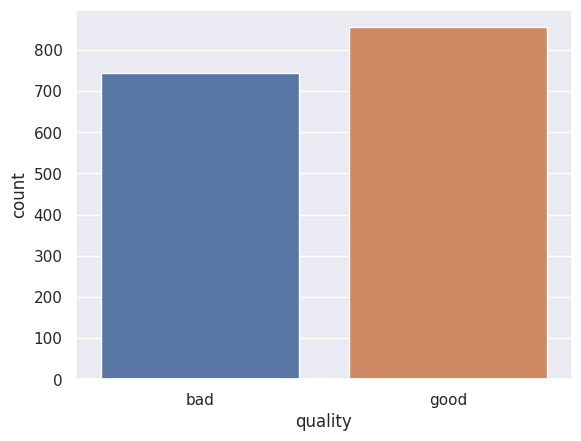

In [7]:
import seaborn as sns
sns.countplot(x='quality', data=wine_data)

## Part 2: Preprocess data

In [8]:
wine_data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

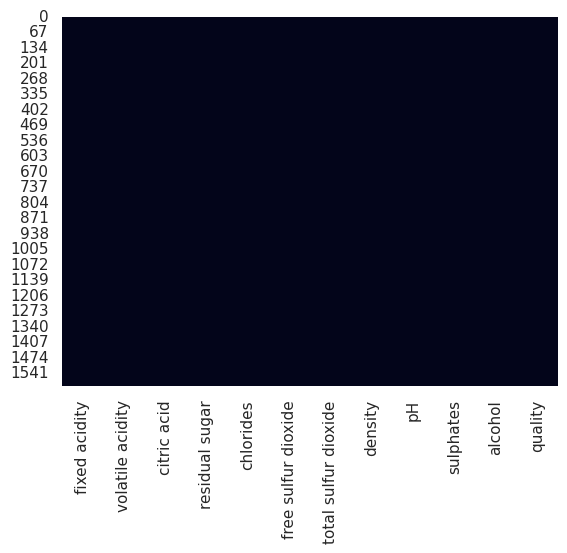

In [9]:
sns.heatmap(wine_data.isnull(), cbar=False)

In [10]:
# Check missing value in data
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Handling Categorical Data With Dummy Variables

In [11]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [12]:
wine_data['quality'] = [1 if element == 'good' else 0 for element in wine_data['quality']]

### TODO: Train/Test separation

X/y separation

In [13]:
y_data = wine_data['quality']
x_data = wine_data.drop('quality', axis = 1)

Perform hold-out method
- 80% training set
- 20% testing set

In [19]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2,random_state=0)

### TODO: Feature Scaling

In [15]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [22]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_training_data.loc[:,:]=standard_scaler.fit_transform(x_training_data.loc[:,:])

In [24]:
x_training_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,0.901034,0.054803,0.909414,-0.174359,-0.335359,-0.003122,-0.211913,1.244895,0.520910,-0.223584,-0.955794
679,1.419987,-1.479676,0.909414,0.514355,-0.565570,0.377220,0.056175,0.235179,-1.168416,-0.681310,-0.767274
473,0.901034,-0.986451,1.420842,-0.312102,-0.523713,-1.049065,-0.986389,0.182036,-0.323753,0.749083,0.175328


## TODO: Part 3: Train a logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model

LogisticRegression(random_state=0)

In [26]:
model.fit(x_training_data, y_training_data)

LogisticRegression(random_state=0)

Making Predictions With Our Logistic Regression Model

In [27]:
x_test_data.loc[:,:]=standard_scaler.transform(x_test_data.loc[:,:])

In [28]:
predictions = model.predict(x_test_data)

In [35]:
predictions[0:5]

array([1, 0, 1, 0, 1])

## TODO: Part 4: Model Evaluation

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.750
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       148
           1       0.77      0.76      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [31]:
help(classification_report)

Help on function classification_report in module sklearn.metrics._classification:

classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
    Build a text report showing the main classification metrics.
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_labels,), default=None
        Optional list of label indices to include in the report.
    
    target_names : list of str of shape (n_labels,), default=None
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

## Part 5: Model tuning

### TODO: Try tuning the model to see if you can make it perform better?

You can look at the parameters and functions of Logistic Regression at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### TODO: Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***

C is float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization

In [42]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2',random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.744
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       148
           1       0.79      0.72      0.75       172

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320



In [43]:
# Example for Turing Hyperparameter
best_accuracy = 0

for tuning_C in [0.0000001,0.001,0.1,0.2,0.5,1,2,5,10,100]:
  for tuning_tol in [0.0000001,0.001,0.1,0.2,0.5,1,2,5,10,100]:
    model = LogisticRegression(C=tuning_C, class_weight=None, dual=False, fit_intercept=False,
                                intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
                                penalty='l2',random_state=0, solver='liblinear', tol=tuning_tol,
                                verbose=0, warm_start=False
                               )

    model.fit(x_training_data, y_training_data)
    predictions = model.predict(x_test_data)

    print('---------------------------------------')
    print('C              : '+str(tuning_C))
    print('tol            : '+str(tuning_tol))
    print('Accuracy Score : ' +str( accuracy_score(y_test_data, predictions) ))

    if accuracy_score(y_test_data, predictions) >= best_accuracy:
      best_accuracy = accuracy_score(y_test_data, predictions)
      best_C = tuning_C
      best_tol = tuning_tol

---------------------------------------
C              : 1e-07
tol            : 1e-07
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 0.001
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 0.1
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 0.2
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 0.5
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 1
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 2
Accuracy Score : 0.725
---------------------------------------
C              : 1e-07
tol            : 5
Accuracy Score : 0.4625
---------------------------------------
C              : 1e-07
tol            : 10
Accuracy Score : 0.4625
--------------------------------------